In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\FraudDetectionData.csv")

In [3]:
# Check the data types of the DataFrame
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [4]:
# Change the data type of column 'A' from float64 to float32
df['amount'] = df['amount'].astype('float32')
df['oldbalanceOrg'] = df['oldbalanceOrg'].astype('float32')
df['oldbalanceDest'] = df['oldbalanceDest'].astype('float32')
df['newbalanceOrig'] = df['newbalanceOrig'].astype('float32')
df['newbalanceDest'] = df['newbalanceDest'].astype('float32')

In [5]:
df['step'] = df['step'].astype('int32')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('int32') 
df['isFraud'] = df['isFraud'].astype('int32') 

In [6]:
# Check the data types of the DataFrame
print(df.dtypes)

step                int32
type               object
amount            float32
nameOrig           object
oldbalanceOrg     float32
newbalanceOrig    float32
nameDest           object
oldbalanceDest    float32
newbalanceDest    float32
isFraud             int32
isFlaggedFraud      int32
dtype: object


In [7]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
# Creating a instance of label Encoder.
le = LabelEncoder()
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(df['type'])
# printing label
label
# removing the column 'type' from df
# as it is of no use now.
df.drop("type", axis=1, inplace=True)
# Appending the array to our dataFrame
# with column name 'type'
df["type"] = label
# printing Dataframe
#df

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameDest'])
label
df.drop("nameDest", axis=1, inplace=True)
df["nameDest"] = label
#df

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameOrig'])
label
df.drop("nameOrig", axis=1, inplace=True)
df["nameOrig"] = label
#df

## Split

In [11]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
# Separate the target variable
y = df['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=18)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998709
1    0.001291
Name: isFraud, dtype: float64
0    0.998709
1    0.001291
Name: isFraud, dtype: float64
0    0.99871
1    0.00129
Name: isFraud, dtype: float64


In [12]:
print("Number of rows in X_train:", X_train.shape[0])
print("Number of rows in X_test:", X_test.shape[0])

Number of rows in X_train: 5726358
Number of rows in X_test: 636262


In [13]:
print(y_train.shape)

(5726358,)


## Resampling after train split

In [14]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

# Apply ADASYN only on the minority class of the train set
ada = ADASYN()
X_train_resampled, y_train_resampled = ada.fit_resample(X_train, y_train)

In [15]:
import random
random.seed (20)
import numpy as np
from scipy import stats

# Specify columns with outliers
cols_with_outliers = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Specify the number of bootstrapped samples to create per column
num_samples = 50

# Specify the right trimming proportions for each column
trim_props = {'amount': 0.14, 'oldbalanceOrg': 0.24, 'newbalanceOrig': 0.25, 'oldbalanceDest': 0.22, 'newbalanceDest': 0.22}

# Initialize empty dictionaries to store the trimmed means for each column
train_trimmed_means = {}

# Loop over the specified columns
for col_name in cols_with_outliers:
    
    # Check if the trimming proportion for this column is 0
    if trim_props[col_name] == 0:
        # If so, skip this column and move on to the next one
        continue
    
    # Initialize empty lists to store the bootstrapped samples and the trimmed means for the training set
    train_bootstrapped_samples = []
    train_trimmed_means_list = []
    
    # Loop over the number of desired samples
    for i in range(num_samples):
        # Randomly select indices from the column in the training set
        train_sample_indices = np.random.choice(X_train_resampled.index, size=len(X_train_resampled), replace=True)
        
        # Create a bootstrapped sample by indexing into the column with the selected indices for the training set
        train_sample = X_train_resampled.loc[train_sample_indices, col_name]
        
        # Append the bootstrapped samples to the list for the training set
        train_bootstrapped_samples.append(train_sample)
        
        # Calculate the right trimmed mean of the bootstrapped sample for the training set
        train_right_trimmed_mean = np.mean(train_sample[train_sample <= np.percentile(train_sample, 100*(1-trim_props[col_name]))])
        train_trimmed_means_list.append(train_right_trimmed_mean)
        
    # Calculate the mean of the right trimmed means for the training set and add it to the dictionary
    train_trimmed_means[col_name] = np.mean(train_trimmed_means_list)

    # Replace the outliers in the training set with the trimmed means
    X_train_resampled.loc[X_train_resampled[col_name] > np.percentile(X_train_resampled[col_name], 100*(1-trim_props[col_name])), col_name] = train_trimmed_means[col_name]

# Print the trimmed means for each column separately for the training set
print("Train set trimmed means: ", train_trimmed_means)

Train set trimmed means:  {'amount': 109735.98, 'oldbalanceOrg': 57420.4, 'newbalanceOrig': 0.0, 'oldbalanceDest': 126421.56, 'newbalanceDest': 229792.72}


In [16]:
# Convert float64 columns to float32
float64_cols = df.select_dtypes(include=['float64']).columns
df[float64_cols] = df[float64_cols].astype('float32')

In [17]:
print(y_train.shape)

(5726358,)


### Feature Selection Using Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
# Select top features using Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train_resampled, y_train_resampled)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X_train_resampled.columns[indices][:5]  # select top 5 features
print(top_features )

Index(['oldbalanceOrg', 'type', 'nameDest', 'amount', 'step'], dtype='object')


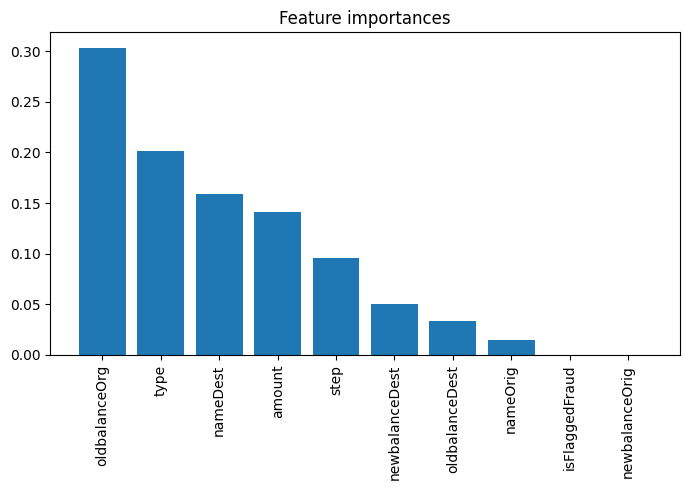

In [26]:
import matplotlib.pyplot as plt
# Plot feature importances
plt.figure(figsize=(7, 5))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X_train_resampled.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# # Subset X_train to include only selected features
# X_train_selected = X_train[top_features]

In [40]:
index_of_b = df.columns.get_loc('oldbalanceOrg')
print(index_of_b) 

2


In [32]:
index_of_b = df.columns.get_loc('type')
print(index_of_b) 

8


In [33]:
index_of_b = df.columns.get_loc('nameDest')
print(index_of_b) 

9


In [34]:
index_of_b = df.columns.get_loc('amount')
print(index_of_b) 

1


In [35]:
index_of_b = df.columns.get_loc('step')
print(index_of_b) 

0


In [ ]:
# #Extract same features in test set,select the columns by index
# selected_indices = [5,0,2,4,1]
# X_test_selected = X_test.iloc[:, selected_indices]

In [20]:
# Assuming your original training data is stored in a pandas DataFrame called X_train
# And assuming you have a list of selected feature names called selected_features
selected_features = ['oldbalanceOrg', 'type', 'nameDest','amount','step']
X_train_selected = X_train_resampled[selected_features]

In [21]:
print(X_train_selected.shape) 

(11438409, 5)


In [39]:
X_train_selected

,oldbalanceOrg,type,nameDest,amount,step
0,3296.000000,1,11427,305161.156250,373
1,0.000000,3,1743120,8840.879883,406
2,10548.000000,3,736364,3120.010010,205
3,0.000000,1,555402,345647.000000,301
4,0.000000,1,21238,109735.976562,353
...,...,...,...,...,...
11438404,69272.710938,4,513957,69272.710938,259
11438405,126515.968750,4,483781,126515.968750,473
11438406,126876.750000,4,482834,126876.750000,480
11438407,73590.828125,4,513990,73590.828125,256


<span style="color:blue"> Hyperparameter tuning: Random Forest </span>


## Hyperparamter Tuning: Random Forest

In [27]:
from scipy.stats import randint as sp_randint
# Define the hyperparameter search space
param_dist = { 
    'n_estimators': sp_randint(100,300),
    'max_features': ['sqrt', 'log2'],
    'max_depth' : sp_randint(2,5),
    'criterion' :['gini', 'entropy'],
    'min_samples_split':sp_randint(2, 5),
    'ccp_alpha':[0.0, 0.1, 0.2, 0.3],
}

In [28]:
from sklearn.experimental import enable_halving_search_cv  
from sklearn.model_selection import HalvingRandomSearchCV

# Set up the HalvingRandomSearchCV with aggressive early stopping
search = HalvingRandomSearchCV(rf, param_dist, cv=5,verbose=1, 
                               factor=2, resource='n_samples', max_resources=100, 
                               aggressive_elimination=True, random_state=3, 
                               scoring='accuracy', refit=True)

# Fit the HalvingRandomSearchCV object to the resampled training data
search.fit(X_train_selected, y_train_resampled)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 20
max_resources_: 100
aggressive_elimination: True
factor: 2
----------
iter: 0
n_candidates: 5
n_resources: 20
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 1
n_candidates: 3
n_resources: 40
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 2
n_resources: 80
Fitting 5 folds for each of 2 candidates, totalling 10 fits


HalvingRandomSearchCV(aggressive_elimination=True,
                      estimator=RandomForestClassifier(random_state=0),
                      factor=2, max_resources=100,
                      param_distributions={'ccp_alpha': [0.0, 0.1, 0.2, 0.3],
                                           'criterion': ['gini', 'entropy'],
                                           'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FACCD66E88>,
                                           'max_features': ['sqrt', 'log2'],
                                           'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FACCD6F188>,
                                           'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FACC6949C8>},
                      random_state=3, scoring='accuracy', verbose=1)

In [29]:
# Get the best hyperparameters and evaluate on the test set
best_params = search.best_params_
best_model = search.best_estimator_

In [50]:
#Extract same features in test set,select the columns by index
selected_indices = [2,7,8,1,0]
X_test_selected = X_test.iloc[:, selected_indices]

In [51]:
X_test_selected

,oldbalanceOrg,type,nameDest,amount,step
1402687,2.080000e+03,0,75898,176116.968750,139
2760752,5.854688e+06,0,119926,559868.187500,213
3594236,2.745168e+05,3,1249878,8622.099609,262
1933631,7.080094e+04,3,2423326,30724.619141,177
2227203,0.000000e+00,4,426875,815273.687500,186
...,...,...,...,...,...
3753638,0.000000e+00,3,2617210,1305.969971,279
1532557,1.235073e+06,3,1970706,26853.359375,154
2800777,1.291580e+04,3,2318385,28641.919922,217
2444235,2.710670e+05,3,1893170,10589.280273,203


In [52]:
y_pred = best_model.predict(X_test_selected)

In [53]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Best hyperparameters:", best_params)
print("Test set accuracy:", accuracy)

Best hyperparameters: {'ccp_alpha': 0.1, 'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 181}
Test set accuracy: 0.7935756025033712


## Hyperparamter tuning-OOB error

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(100, 300),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(2, 5),
    'criterion': ['gini', 'entropy'],
    'min_samples_split': randint(2, 5),
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3]
}

In [ ]:
# Create a random forest classifier with OOB scoring
rf = RandomForestClassifier(oob_score=True, random_state=42)
  
# Use RandomizedSearchCV to search for the best hyperparameters
search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=3,random_state=42)
search.fit(X_train_selected, y_train_resampled)

# Print the best hyperparameters and OOB error
print("Best hyperparameters:", search.best_params_)
print("OOB error:", 1 - search.best_score_)

## Random forest with the hyperparameters

Fold: 1
Confusion matrix:
 [[1488677  417645]
 [   4757 1901724]]
Recall: 0.9975048269560515
Accuracy: 0.8892148374830801
Precision: 0.819931627955707
F1-score: 0.9000433048972397
---------------------
Fold: 2
Confusion matrix:
 [[1512304  394018]
 [   6307 1900174]]
Recall: 0.9966918107235267
Accuracy: 0.8950050658268995
Precision: 0.8282541304302342
F1-score: 0.9046997945329236
---------------------
Fold: 3
Confusion matrix:
 [[1511964  394358]
 [   7209 1899272]]
Recall: 0.9962186877288575
Accuracy: 0.8946793212237821
Precision: 0.8280638115127549
F1-score: 0.9043913363242067
---------------------


Text(0.5, 1.0, 'Receiver Operating Characteristic')

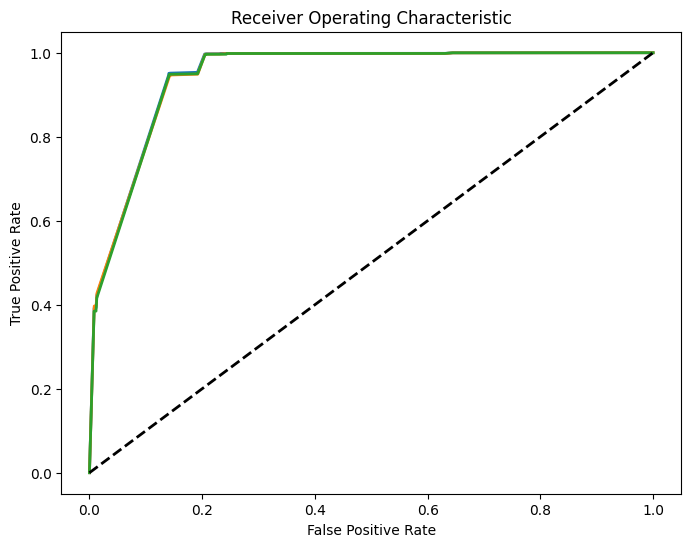

In [55]:
#1500 does not work
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score

# Define the number of splits for stratified cross-validation
n_splits = 3

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

# Create lists to store evaluation metrics for each fold
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []

# Create lists to store ROC curve data for each fold
fprs = []
tprs = []
aucs = []

# Iterate over each fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_selected, y_train_resampled)):
    print(f'Fold: {fold+1}')
    
    # Split the data into training and validation sets
    X_fold_train, y_fold_train = X_train_selected.iloc[train_idx], y_train_resampled.iloc[train_idx]
    X_val, y_val = X_train_selected.iloc[val_idx], y_train_resampled.iloc[val_idx]
    
    # Create a RandomForestClassifier object with the given hyperparameters
    rf_model = RandomForestClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=4, max_features='sqrt', min_samples_split=4, n_estimators=181)
   
    # Fit the model on the training data
    rf_model.fit(X_train_selected, y_train_resampled)

    # Predict the class labels for the validation set
    y_val_pred = rf_model.predict(X_val)

    # Compute the evaluation metrics for the current fold
    conf_mat = confusion_matrix(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    # Append the evaluation metrics for the current fold to the lists
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)
    accuracy_scores.append(accuracy)
    
    # Compute the ROC curve and AUC for the current fold
    fpr, tpr, _ = roc_curve(y_val, rf_model.predict_proba(X_val)[:,1])
    roc_auc = auc(fpr, tpr)
    
    # Append the ROC curve data for the current fold to the lists
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(roc_auc)

    # Print the evaluation metrics for the current fold
    print('Confusion matrix:\n', conf_mat)
    print('Recall:', recall)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('F1-score:', f1)
    print('---------------------')

# Create the ROC curve plot
plt.figure(figsize=(8,6))

#Plot the ROC curve for each fold
for i in range(n_splits):
    plt.plot(fprs[i], tprs[i], lw=2, label='Fold %d (AUC = %0.2f)' % (i+1, aucs[i]))

# Add labels and legend to the plot
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

In [60]:
print('Average F1-score:', sum(f1_scores)/len(f1_scores))
print('Average Recall_scores:', sum(recall_scores)/len(recall_scores))
print('Average Recall_scores:', sum(precision_scores)/len(precision_scores))
print('Average Recall_scores:', sum(accuracy_scores)/len(accuracy_scores))

Average F1-score: 0.9030448119181234
Average Recall_scores: 0.9968051084694786
Average Recall_scores: 0.8254165232995653
Average Recall_scores: 0.8929664081779206


## NEW

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score
import numpy as np

# Define the number of splits for stratified cross-validation
n_splits = 3

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

# Create lists to store evaluation metrics for each fold
f1_scores = []
recall_scores = []
precision_scores = []
accuracy_scores = []

# Create lists to store ROC curve data for each fold
fprs = []
tprs = []
aucs = []

# Initialize the OOB error list
oob_error = []

# Iterate over each fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_selected, y_train_resampled)):
    print(f'Fold: {fold+1}')
    
    # Split the data into training and validation sets
    X_fold_train, y_fold_train = X_train_selected.iloc[train_idx], y_train_resampled.iloc[train_idx]
    X_val, y_val = X_train_selected.iloc[val_idx], y_train_resampled.iloc[val_idx]
    
    
    # Create a RandomForestClassifier object with the given hyperparameters
    rf_model = RandomForestClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=4, max_features='sqrt', min_samples_split=4, n_estimators=181, oob_score=True)
   
    # Fit the model on the training data
    rf_model.fit(X_fold_train, y_fold_train)

    # Predict the class labels for the validation set
    y_val_pred = rf_model.predict(X_val)

    # Compute the evaluation metrics for the current fold
    conf_mat = confusion_matrix(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)

    # Append the evaluation metrics for the current fold to the lists
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)
    accuracy_scores.append(accuracy)
    
    # Compute the ROC curve and AUC for the current fold
    fpr, tpr, _ = roc_curve(y_val, rf_model.predict_proba(X_val)[:,1])
    roc_auc = auc(fpr, tpr)
    
    # Append the ROC curve data for the current fold to the lists
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(roc_auc)
    
    # Compute the OOB error for the current fold and append to the list
    oob_error.append(1 - rf_model.oob_score_)

    # Print the evaluation metrics for the current fold
    print('Confusion matrix:\n', conf_mat)
    print('Recall:', recall)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('F1-score:', f1)
    print('OOB error:', 1 - rf_model.oob_score_)
    print('---------------------')

# Create the ROC curve plot
fig, ax = plt.subplots(figsize=(8,6))

# Plot the ROC curve for each fold
for i in range(n_splits):
    ax.plot(fprs[i], tprs[i], lw=2, label='Fold %d (AUC = %0.2f)' % (i+1, aucs[i]))

# Add a dashed line representing the random guess classifier
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='black', label='Random guess')

# Add labels and legend to the plot
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend()

## Evaluation scores for test set

In [ ]:
# Predict the class labels for the test set
y_test_pred = rf_model.predict(X_test_selected)

# Compute the evaluation metrics for the test set
conf_mat_test = confusion_matrix(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

# Print the evaluation metrics for the test set
print('Evaluation metrics on test set:')
print('Confusion matrix:\n', conf_mat_test)
print('Recall:', recall_test)
print('Accuracy:', accuracy_test)
print('Precision:', precision_test)
print('F1-score:', f1_test)

## ROC Curve test set

In [ ]:
# Predict the class labels and probabilities for the test set
y_test_pred = rf_model.predict(X_test_selected)
y_test_prob = rf_model.predict_proba(X_test_selected)[:, 1]

# Compute the false positive rate, true positive rate, and AUC for the test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curve for the test set
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='Test ROC curve (AUC = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend(loc="lower right")
plt.show()

out-of-sample testing" or "model validation.

https://www.bing.com/images/search?view=detailV2&ccid=HiBreHJ1&id=4AE90CD5515EF4A6E50E9C0688ACB5FE7C375F42&thid=OIP.HiBreHJ1b7h-1uQEgXJDfQHaFB&mediaurl=https%3A%2F%2Fmiro.medium.com%2Fmax%2F552%2F1*80OL6-Nn2oYwQPcS3aO3jg.png&exph=374&expw=552&q=graphs+for+random+forest&simid=608008151010657800&form=IRPRST&ck=18435DC859CC9886473DD5FB88D029A8&selectedindex=29&ajaxhist=0&ajaxserp=0&vt=0&sim=11&cdnurl=https%3A%2F%2Fth.bing.com%2Fth%2Fid%2FR.1e206b7872756fb87ed6e4048172437d%3Frik%3DQl83fP61rIgGnA%26pid%3DImgRaw%26r%3D0